# David Omar Paredes Paredes
# Abraham Maximiliano Ávalos Corrales

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution as DE_scipy
from DE import DiferentialEvolution as DE_custom
import time

In [2]:
def graphicate(sol, pX, pY):
    A,B,C = sol
    y = A*np.sin(B*pX+np.pi*C)
    pX = df['x'].values
    pY = df['y'].values
    plt.scatter(pX,pY)
    plt.plot(pX,y)
    plt.show()


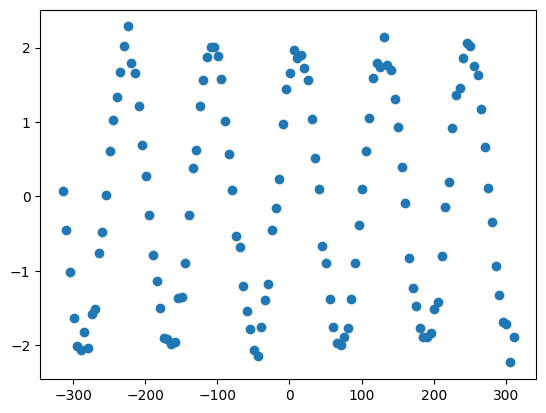

In [3]:
df = pandas.read_csv('datos.csv')
pX = df['x'].values
pY = df['y'].values
plt.scatter(pX,pY)
plt.show()

In [4]:
def objective_function(ind,pX,pY):
    A,B,C = ind
    y = A*np.sin(B*pX+np.pi*C)
    return np.sum( np.abs(pY-y) )

bounds = [[-100,100],[-100,100],[-100,100]]

# DE scipy

 message: Maximum number of iterations has been exceeded.
 success: False
     fun: 10.651938969622154
       x: [ 1.991e+00 -8.550e+01 -1.444e+01]
     nit: 1000
    nfev: 45469
     jac: [-1.895e+00  3.879e+02 -5.678e+00]
time per it:   0.003099740982055664
time elapsed:  3.099740982055664


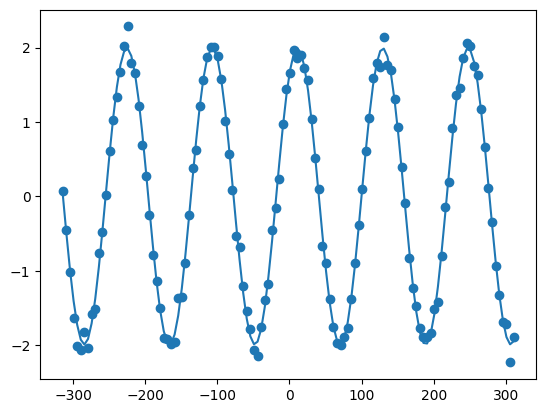

In [5]:
start = time.time()

ans_scipy = DE_scipy(objective_function, bounds, args=(pX,pY), maxiter=1000, 
                       popsize=15, mutation=(0.5, 1.9), recombination=0.7)
end = time.time()
time_scipy_per_it = (end - start)/ans_scipy.nit
print(ans_scipy)
print("time per it:  ",  time_scipy_per_it)
print("time elapsed: ", end-start)
graphicate(ans_scipy.x, pX, pY)
# graphicate(ans_scipy '''resp.x''', pX, pY)

# DE own implementation

In [6]:
custom_de = DE_custom(
	objective_function,
	bounds,
	args=(pX,pY),
	popsize=100,
	mutation=(0.5,1.9),
	crossover=0.7,
	maxit=1000,
	verbose=False
)

start = time.time()
ans_custom = custom_de.optimize()
end = time.time()

time_custom_per_it = (end - start)/ans_custom['niter']

print(ans_custom)
print(f'time per it:  {time_custom_per_it}')
print(f'time elapsed: {end-start}')

{'success': True, 'sol': array([ 1.98996556e+00, -3.17985778e+05, -5.48130783e+06]), 'fitness': 11.572442239963676, 'niter': 470}
time per it:  0.004146422731115463
time elapsed: 1.9488186836242676


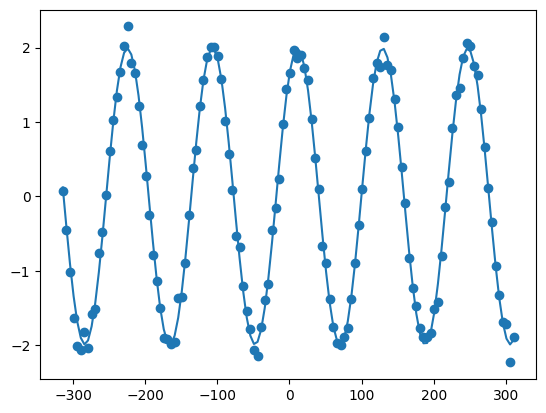

In [7]:
graphicate(ans_custom['sol'], pX, pY)

In [8]:
data = {
    'DE scipy':[ans_scipy.nit, time_scipy_per_it, ans_scipy.fun ],
    'DE custom':[ans_custom['niter'], time_custom_per_it, ans_custom['fitness'] ]
}

# Create a list of row names
row_names = ['iter', 'time_per_iter', 'error']

df = pandas.DataFrame(data)

# Set the row names
df.index = row_names
print(df)

                  DE scipy   DE custom
iter           1000.000000  470.000000
time_per_iter     0.003100    0.004146
error            10.651939   11.572442
